In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from collections import defaultdict
import heapq
from timeit import default_timer as timer
%matplotlib inline

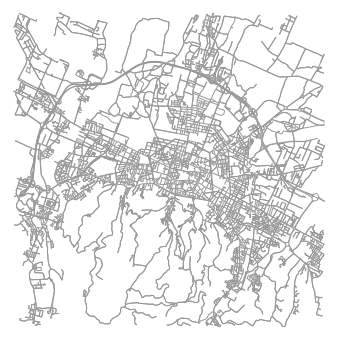

In [2]:
G = ox.load_graphml('network.graphml')
fig, ax = ox.plot_graph(G, node_color='w')

In [3]:
nodes, edges = ox.graph_to_gdfs(G)

In [4]:
lista_nodi = nodes['osmid'].tolist()
tail = edges['u'].tolist()
head = edges['v'].tolist()
weight = edges['length'].tolist()
my_edges = []

for i in range(len(tail)):
    my_edges.append([tail[i],head[i],weight[i]])

graph = defaultdict(list)
for t, h, w in my_edges:
    graph[t].append((h, w))



In [5]:
def Heap_Dijkstra(graph, source, target):
    
    distance = {}
    padre = {}
    for i in lista_nodi:
        distance[i] = 999999
        padre[i] = None
        
    distance[source] = 0
    q = [(0, source)]
    visited = []
    
    while target not in visited:
        
        curr_dist, curr_node = heapq.heappop(q)
        if curr_node not in visited:
            visited.append(curr_node)
            for neighbor, cost in graph[curr_node]:
                if curr_dist + cost < distance[neighbor]:
                    distance[neighbor]= curr_dist + cost
                    padre[neighbor]= curr_node
                    heapq.heappush(q, (distance[neighbor], neighbor))
    
    parent = [target]
    num = 0
    while source not in parent:
        parent.append(padre[parent[num]])
        num = num + 1
    result = parent[::-1]
    
    print("Amount of visited nodes: " + str(len(visited)))
    print("Cost: " + str(distance[target]))
    print("Path: " + str(result))
    fig, ax = ox.plot_graph_route(G, result, node_color='w')
    
    nc = ['r' if (node == target) else 'b' if (node in visited) else 'w' for node in G.nodes()]
    test = [100 if (node == source or node == target) else 4 if (node in visited) else 0 for node in G.nodes()]
    fig, ax = ox.plot_graph(G, node_size=test, node_color=nc, edge_linewidth=0.8, node_zorder = 3)

Amount of visited nodes: 4072
Cost: 5617.027000000001
Path: [400885366, 251885681, 251891683, 250734925, 250763454, 1219012774, 1219012770, 402601423, 250715915, 250762010, 3292011304, 3292011306, 250761907, 250761922, 250761957, 250761995, 250761934, 2146910608, 250761923, 2146913964, 250762236, 250762498, 4494421052, 566396532, 1667235080, 295457559, 1818378749, 1818378641, 295458998, 295243515, 250762502, 262557689, 262557673, 251909607, 251909608, 251909609, 251909610, 251909616, 251909621, 791746517, 252654961, 2957327372, 791746315, 255330402, 496063942, 298376301, 1689590392, 252654956, 2973847300, 2973847320, 2973847293, 2973847296, 2973847325, 2973847324, 2973847332, 2973851336, 2101631639, 2101631643]


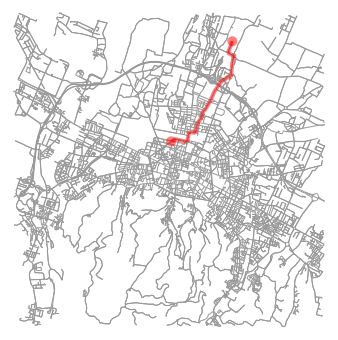

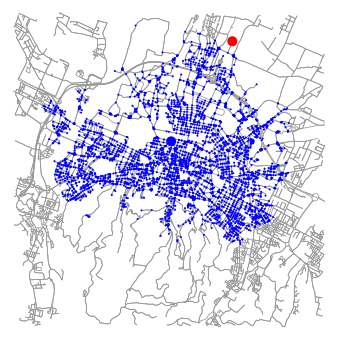

In [6]:
#start = timer()
Heap_Dijkstra(graph, 400885366, 2101631643)
#end = timer()
#print(end - start)